In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# importing csv file

In [5]:
df = pd.read_csv(r"C:\Users\garv\Desktop\shopping.csv")

In [6]:
#  data for performing expolatory data analysis

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
# Checking duplicate values

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

In [10]:
# checking null values

In [11]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [12]:
# Now we Rename columns such as [Frequency of Purchases] , [Purchase Amount (USD)] from table

In [13]:
df = df.rename(columns = {'Frequency of Purchases':'frequently purchase','Purchase Amount (USD)'	:'purchase_amount'}) 

In [14]:
df.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,purchase_amount,Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,frequently purchase
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


In [15]:
#  Lets check unique values

In [16]:
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
purchase_amount               81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
frequently purchase            7
dtype: int64

In [45]:
df.describe(include = 'object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,frequently purchase
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [20]:
# from the graph we can see that most of the buyers are males

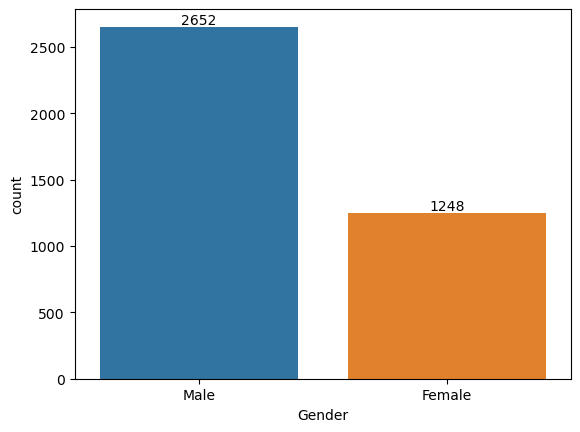

In [21]:
ax = sns.countplot(x = 'Gender' , data = df )
for bars in ax.containers:
    ax.bar_label(bars)


In [22]:
# Most shopped category based on gender

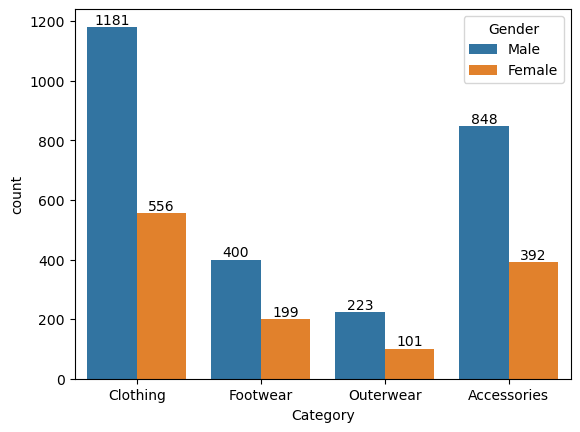

In [23]:
ax = sns.countplot(data = df , x = 'Category' , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    

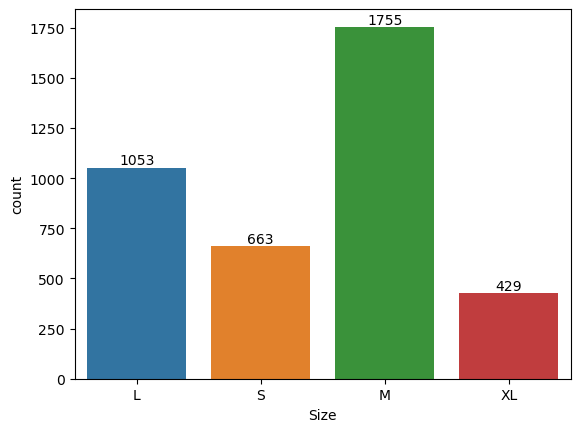

In [24]:
ac = sns.countplot(data = df , x =  'Size')
for bars in ac.containers:
    ac.bar_label(bars)

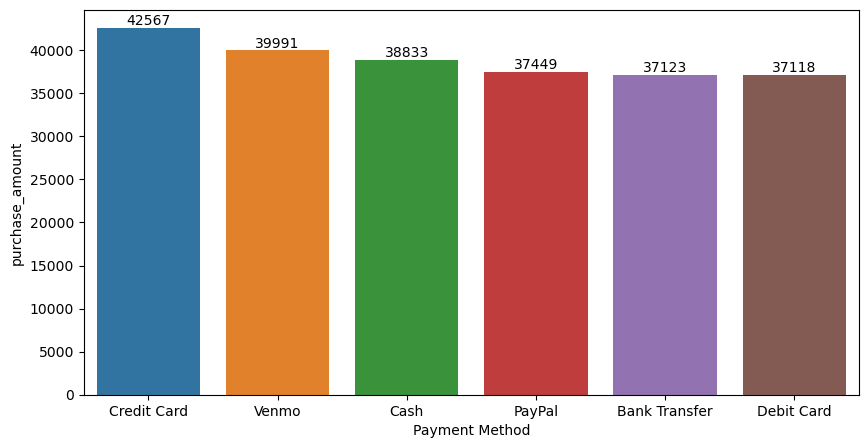

In [44]:
plt.figure(figsize=(10,5))
ac = df.groupby(['Payment Method'	],as_index = False)['purchase_amount'].sum().sort_values(by = 'purchase_amount' , ascending = False)

ac = sns.barplot(x = 'Payment Method'	 , y = 'purchase_amount' , data = ac)
for bars in ac.containers:
    ac.bar_label(bars)

In [ ]:
# from the above graph we can see that mostly customers preffered credit card and venmo then cash

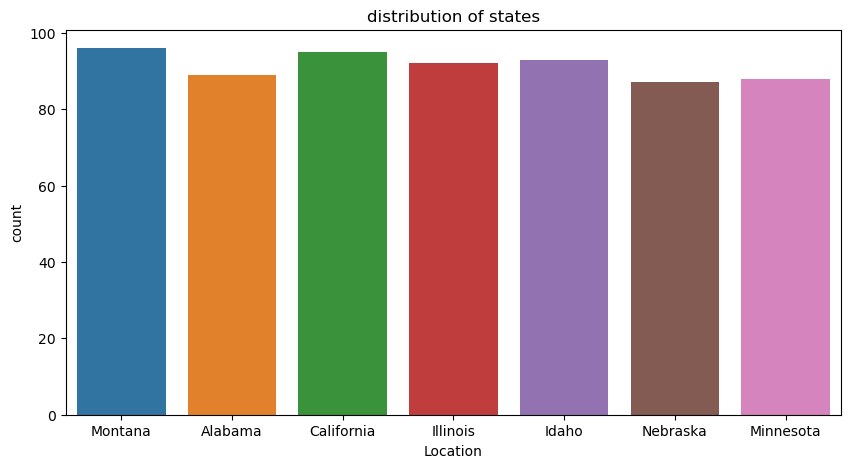

In [71]:
states = df['Location'].value_counts().head(7)
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location'].isin(states.index)],x= 'Location')
plt.xlabel('Location')
plt.ylabel('count')
plt.title('distribution of states')
plt.show()

In [ ]:
# CONCLUSION

# Most of the buyers are from calofornia and Montana

# People prefferd credit card and venmo over cash and debit card

# Highest selling clothing sizes are  M and L

# In Males and Females most shopped category is clothing and then accessories

# Males has highest count of shopping compare to Females